<a href="https://colab.research.google.com/github/bimapamungkas666/UTS/blob/main/uts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
!pip install google-search-results

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
from serpapi import GoogleSearch
from urllib.parse import *

In [62]:
from serpapi import GoogleSearch

params = {
  "api_key": "441e5eafa042f65a0303af1ddebbbc5fdce468d24492564c9501805fbf928b9a",
  "device": "desktop",
  "engine": "google_maps",
  "type": "search",
  "google_domain": "google.com",
  "q": "wisata semarang",
  "hl": "en",
  "ll": "@40.7455096,-74.0083012,14z"
}

search = GoogleSearch(params)
results = search.get_dict()
search = GoogleSearch(params)

mPosition = 0 # Angka indeks dari data
mNums = 5 # Batas jumlah data yang ditampilkan
local_results = []

while mPosition <= mNums:
  results = search.get_dict()

  for result in results["local_results"]:
    mPosition += 1
    
    if mPosition <= mNums:
      
      # Jika jumlah review kurang dari 150, maka jangan masukkan datanya
      if result["reviews"] < 150:
        mNums += 1
        continue
        
      # Append data sesuai dengan batas jumlah yang sudah ditentukan
      local_results.append({'title': result["title"],
                           'data_id': result["data_id"],
                           'reviews_total': result["reviews"]});

  if "next" in results.get("serpapi_pagination", {}):
    # Akan mengubah parameter dari 'GoogleSearch()' dengan isi parameter dari halaman selanjutnya
    search.params_dict.update(dict(parse_qsl(urlsplit(results.get("serpapi_pagination").get("next")).query)))

  else:
    break

https://serpapi.com/search
https://serpapi.com/search


In [63]:
for lr in local_results:
  print(lr)

{'title': 'Lawang Sewu', 'data_id': '0x2e708b4f19af0393:0x11304de4230ded0d', 'reviews_total': 62911}
{'title': 'Kota Lama Semarang', 'data_id': '0x2e70f4a9c5b90845:0xcdad87f56d2be6e', 'reviews_total': 20089}
{'title': 'Kampung Pelangi', 'data_id': '0x2e708c54eb15a0a5:0x21051fe4e22e41db', 'reviews_total': 3856}
{'title': 'Semarang Chinatown', 'data_id': '0x2e70f4aab14d29ab:0xbe7ff6928f077887', 'reviews_total': 3443}
{'title': 'Grand Maerakaca', 'data_id': '0x2e70f4d1d1aea6e7:0xf936da89553247a2', 'reviews_total': 4314}


In [64]:
data = {'wisata_name':[],
        'name':[],
        'rating':[],
        'review':[]}

for lr in local_results:
  
  params = {
    "engine": "google_maps_reviews",
    "data_id": "",
    "api_key": "441e5eafa042f65a0303af1ddebbbc5fdce468d24492564c9501805fbf928b9a"
  }
  
  params["data_id"] = lr['data_id']

  search = GoogleSearch(params)

  mPosition = 0 # Angka indeks dari data
  mNums = 10 # Batas jumlah data yang ditampilkan

  while mPosition <= mNums:
    results = search.get_dict()

    for result in results["reviews"]:
      mPosition += 1

      if mPosition <= mNums:
        # Append data sesuai dengan batas jumlah yang sudah ditentukan
        data['wisata_name'].append(lr['title']);
        data['name'].append(result["user"]["name"]);
        data['rating'].append(result["rating"]);
        data['review'].append(result["snippet"]);

    if "next" in results.get("serpapi_pagination", {}):
      # Akan mengubah parameter dari 'GoogleSearch()' dengan isi parameter dari halaman selanjutnya
      search.params_dict.update(dict(parse_qsl(urlsplit(results.get("serpapi_pagination").get("next")).query)))

    else:
      break
    
review_original = data['review']

https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search


In [65]:
import pandas as pd
df_original = pd.DataFrame(data)
df_original.to_csv('hasil.csv', index=False)

In [66]:
df_original

,wisata_name,name,rating,review
0,Lawang Sewu,Adhilla Salsabila,5.0,Perfect place to stroll around and enjoy the v...
1,Lawang Sewu,Ethan Josiah Effendi,5.0,"Not spooky at all. In fact, it was quite the o..."
2,Lawang Sewu,Redzky Yoga,5.0,This is an extraordinary place! You must do a ...
3,Lawang Sewu,Roy Tan,3.0,Looks beautiful from the outside. Nothing much...
4,Lawang Sewu,Yasmina Wulandari,5.0,Beautiful building filled with history. Good p...
5,Lawang Sewu,Dianita Kartika,5.0,An astonishing historical site. This building ...
6,Lawang Sewu,Merylle Rose Appoy,5.0,"I had a great time during my visit, there are ..."
7,Lawang Sewu,arif rahmanto,5.0,"Historical place at Semarang Clean, comfort an..."
8,Lawang Sewu,Yohanes Jusuf,4.0,Historical building. Got street parking next t...
9,Lawang Sewu,Frans Jan Pieter Sipayung,4.0,Nice place..visiting at noon and night will be...


In [67]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [68]:
review_remove_translated = []

for review in review_original:
  review_sep = review.split("(Translated by Google) ")
  
  # Jika terdapat (Translated by Google)
  if review_sep[0] == "":
    review_sep = ("".join(review_sep)).split("(Original)")
    review_sep = review_sep[0]
    review = "".join(review_sep)
    
  review_remove_translated.append(review)

In [69]:
filename = "https://raw.githubusercontent.com/bimapamungkas666/UTS/main/hasil.csv"
df = pd.read_csv('hasil.csv')
df.head()

,wisata_name,name,rating,review
0,Lawang Sewu,Adhilla Salsabila,5.0,Perfect place to stroll around and enjoy the v...
1,Lawang Sewu,Ethan Josiah Effendi,5.0,"Not spooky at all. In fact, it was quite the o..."
2,Lawang Sewu,Redzky Yoga,5.0,This is an extraordinary place! You must do a ...
3,Lawang Sewu,Roy Tan,3.0,Looks beautiful from the outside. Nothing much...
4,Lawang Sewu,Yasmina Wulandari,5.0,Beautiful building filled with history. Good p...


In [70]:
df_original

,wisata_name,name,rating,review
0,Lawang Sewu,Adhilla Salsabila,5.0,Perfect place to stroll around and enjoy the v...
1,Lawang Sewu,Ethan Josiah Effendi,5.0,"Not spooky at all. In fact, it was quite the o..."
2,Lawang Sewu,Redzky Yoga,5.0,This is an extraordinary place! You must do a ...
3,Lawang Sewu,Roy Tan,3.0,Looks beautiful from the outside. Nothing much...
4,Lawang Sewu,Yasmina Wulandari,5.0,Beautiful building filled with history. Good p...
5,Lawang Sewu,Dianita Kartika,5.0,An astonishing historical site. This building ...
6,Lawang Sewu,Merylle Rose Appoy,5.0,"I had a great time during my visit, there are ..."
7,Lawang Sewu,arif rahmanto,5.0,"Historical place at Semarang Clean, comfort an..."
8,Lawang Sewu,Yohanes Jusuf,4.0,Historical building. Got street parking next t...
9,Lawang Sewu,Frans Jan Pieter Sipayung,4.0,Nice place..visiting at noon and night will be...


In [71]:
df.drop(columns = ['wisata_name', 'name'], inplace = True)

In [72]:
df.head()

,rating,review
0,5.0,Perfect place to stroll around and enjoy the v...
1,5.0,"Not spooky at all. In fact, it was quite the o..."
2,5.0,This is an extraordinary place! You must do a ...
3,3.0,Looks beautiful from the outside. Nothing much...
4,5.0,Beautiful building filled with history. Good p...


In [73]:
#  Shape of the dataset, and breakdown of the classes
print("Input data has {} rows and {} columns".format(len(df), len(df.columns)))

Input data has 50 rows and 2 columns


Number of null in label: 0
Number of null in text: 0


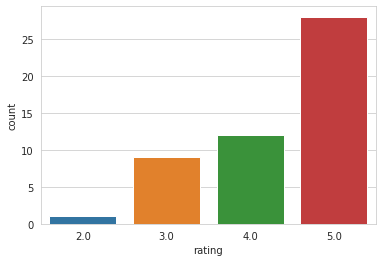

In [74]:
# Missing values in the dataset
print("Number of null in label: {}".format(df['rating'].isnull().sum()))
print("Number of null in text: {}".format(df['review'].isnull().sum()))
sns.countplot(x='rating', data=df);

In [75]:
ham_list=df['review'].tolist()
filtered_ham = ("").join(ham_list) #convert the list into a string of ham
filtered_ham = filtered_ham.lower()

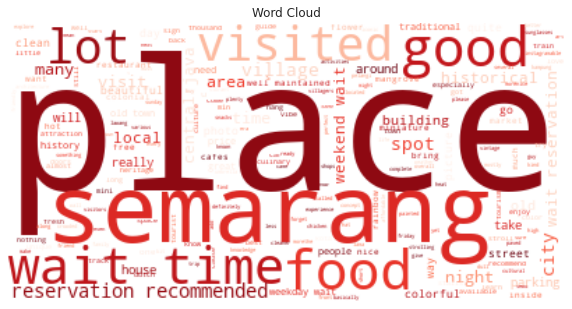

In [76]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_ham)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Word Cloud")
plt.show()

In [77]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

# Warnings
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.pandas.set_option('display.max_columns', None)